In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
k = pd.read_csv('../Dados/CSV/kappa.csv')
g = pd.read_csv('../Dados/CSV/G.csv')

In [158]:
kt = k.transpose()
gt = g.transpose()

In [159]:
kt.columns =k.Exp
gt.columns = g.Exp

In [160]:
k= k.drop(['Exp'],axis=1)
kt =kt.drop(['Exp'],axis=0)
g= g.drop(['Exp'],axis=1)
gt =gt.drop(['Exp'],axis=0)

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

In [11]:
from scipy.stats import ttest_ind
import scipy.stats as stats


In [62]:

stats.f_oneway(k['K-NN'].values,k.DT)

F_onewayResult(statistic=0.18393358926997122, pvalue=0.6718394405973984)

In [63]:
ttest_ind(k.DT.values,k.RF.values)

Ttest_indResult(statistic=2.4854206666042247, pvalue=0.020301732621285092)

In [64]:
stats.f_oneway(k['K-NN'].values,k.SVM)

F_onewayResult(statistic=9.032598171034383, pvalue=0.006126192848832313)

# Algoritmos

In [161]:
k1=k.melt()
g1=g.melt()

In [163]:
g1.head()

,variable,value
0,K-NN,0.757282
1,K-NN,0.746966
2,K-NN,0.734830
3,K-NN,0.699636
4,K-NN,0.736044


In [164]:
k1.head()

,variable,value
0,K-NN,0.640379
1,K-NN,0.632030
2,K-NN,0.614760
3,K-NN,0.564184
4,K-NN,0.612278


In [165]:
tukey1_k= pairwise_tukeyhsd(k1.value.values,k1.variable.values)
tukey1_g= pairwise_tukeyhsd(g1.value.values,g1.variable.values)

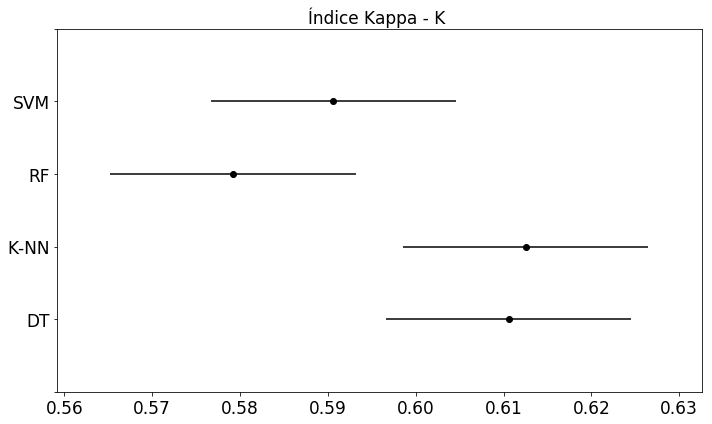

In [192]:
tukey1_k.plot_simultaneous()
plt.title('Índice Kappa - K ',fontsize=17)
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)
plt.tight_layout()
plt.savefig('../mapas/K_T.png')

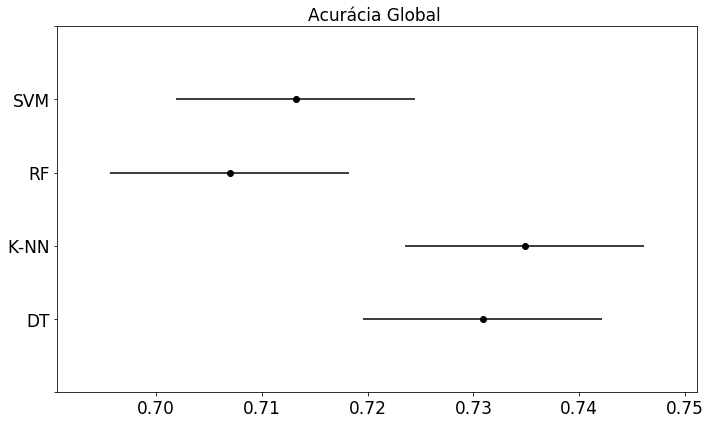

In [193]:
tukey1_g.plot_simultaneous()
plt.title('Acurácia Global ',fontsize=17)
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)
plt.tight_layout()
plt.savefig('../mapas/G_T.png')

In [177]:
tukey1.summary()

group1,group2,meandiff,lower,upper,reject
DT,K-NN,0.0019,-0.026,0.0299,False
DT,RF,-0.0314,-0.0593,-0.0034,True
DT,SVM,-0.02,-0.0479,0.008,False
K-NN,RF,-0.0333,-0.0612,-0.0054,True
K-NN,SVM,-0.0219,-0.0498,0.006,False
RF,SVM,0.0114,-0.0165,0.0393,False


# experimento

In [178]:
kt1=kt.melt()
gt1=gt.melt()

In [179]:
kt1.head()

,Exp,value
0,A1,0.640379
1,A1,0.622565
2,A1,0.679359
3,A1,0.625584
4,A2,0.63203


In [180]:
variavel_k = kt1.Exp.values
valores_k = kt1.value.astype('float')
variavel_g = gt1.Exp.values
valores_g = gt1.value.astype('float')


In [181]:
tukey2_k = pairwise_tukeyhsd(endog=valores_k,groups=variavel_k,alpha=0.05)
tukey2_g = pairwise_tukeyhsd(endog=valores_g,groups=variavel_g,alpha=0.05)

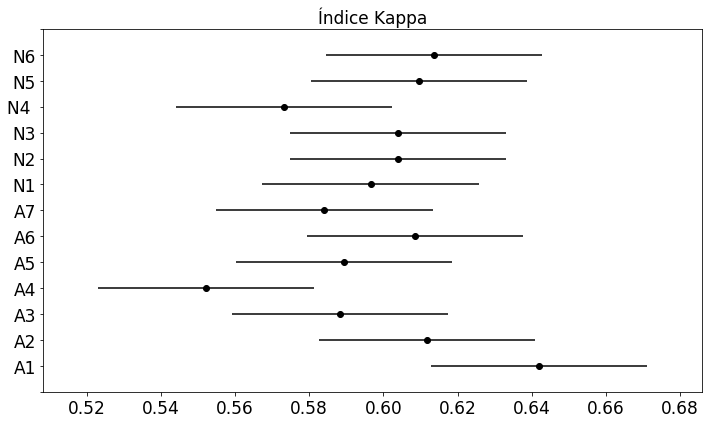

In [194]:
tukey2_k.plot_simultaneous()
plt.title('Índice Kappa',fontsize=17)
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)
plt.tight_layout()
plt.savefig('Exp_k.png')

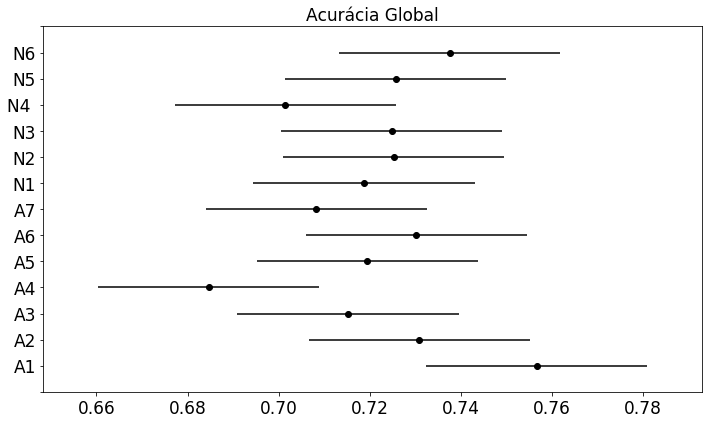

In [195]:
tukey2_g.plot_simultaneous()
plt.title('Acurácia Global',fontsize=17)
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)
plt.tight_layout()
plt.savefig('Exp_G.png')